#### READ RAW OVS DATASETS

In [1]:
# Import libraries
import os
import zipfile
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()

In [5]:
# Load 2019 OVS datasets
combinedtable_zf = zipfile.ZipFile(cwd + r'/Real Data/2019_OVS_v5.zip')
OVS2019 = pd.read_csv(combinedtable_zf.open('2019_OVS_v5.csv', pwd=b'OddVeilShark@2019'))
# Load data dictionary
data_dict = pd.read_excel(cwd + r'/Real Data/Data Dictionary for NUS_v5.xlsx',
                          sheet_name='Variable Information', header=1, nrows=266,engine='openpyxl')

In [6]:
# Exclude respondent_id, outlier, dummy, b4 and b13b1 from data_dict
data_dict = data_dict[~data_dict['Variable'].isin(['respondent_id', 'outlier', 'dummy', 'b4', 'b13b1'])]

In [7]:
# Rename the variable names in the data_dict as well
data_dict['Variable'].replace(to_replace={'c4.tot.new': 'Expenditure on Accommodation (c4.tot.new)',
                                          'c6.tot.new': 'Expenditure on F&B (c6.tot.new)',
                                          'c6c_1.r': 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
                                          'c6c_2.r': 'Expenditure on Casual Dining (c6c_2.r)',
                                          'c7.tot.new': 'Expenditure on Transport (c7.tot.new)',
                                          'c10.tot.new': 'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
                                          'c10c_1.r': 'Expenditure on Sightseeing (c10c_1.r)',
                                          'c10c_2.r': 'Expenditure on Attractions (c10c_2.r)',
                                          't7.m.any': 'Expenditure on Shopping (t7.m.any)',
                                          't7.m.well': 'Expenditure on Healthcare & Wellness Products (t7.m.well)',
                                          't7.m.food': 'Expenditure on Confectionery & Food Items (t7.m.food)',
                                          't7.m.fash': 'Expenditure on Fashion (t7.m.fash)',
                                          'c1b.r': 'Package Expenditure Per Person (c1b.r)',
                                          'b13a_112': 'Main POV - Leisure/Holiday (b13a_112)',
                                          'b13a_114': 'Main POV - Visiting Friends/Family (b13a_114)',
                                          'b13a_116': 'Main POV - Business (b13a_116)',
                                          'b13a_117': 'Main POV - Healthcare (b13a_117)',
                                          'b13a_118': 'Main POV - Education/Training/Workshop (b13a_118)',
                                          'b13a_119': 'Main POV - Others (b13a_119)',
                                          'm1': 'Mode of Transport (m1)',
                                          'c1a': 'Travel Package (c1a)'}, inplace=True)

In [8]:
# Select all variables with nominal or ordinal measurement level
categorical_variables = data_dict.loc[(data_dict['Measurement Level']!='Scale') &
                                      (data_dict['Measurement Level'].notnull())]['Variable'].tolist()

#### BENCHMARKS

><u>Original</u>
>
>Identified 22 expenditure components are:
>
>1. Expenditure on Accommodation (c4.tot.new)
>2. <s>Expenditure on Hotels (c4d_1.r + c4d_2.r + c4d_3.r)*</s>
>3. <s>Expenditure on Service Apartment (c4d_6.r)*</s>
>4. <s>Expenditure on Other Accommodations (c4d_4.r + c4d_5.r + c4d_7.r + c4d_8.r)*</s>
>5. Expenditure on F&B (c6.tot.new)
>6. Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)
>7. Expenditure on Casual Dining (c6c_2.r)
>8. <s>Expenditure on Fine-dining, Celebrity Chef Restaurants (c6c_3.r)*</s>
>9. Expenditure on Transport (c7.tot.new)
>10. Expenditure on Sightseeing & Entertainment (c10.tot.new)
>11. Expenditure on Sightseeing (c10c_1.r)
>12. Expenditure on Attractions (c10c_2.r)
>13. <s>Expenditure on Entertainment or Nightspots (c10c_3.r)*</s>
>14. <s>Expenditure on Business (c11.tot.new)*</s>
>15. <s>Expenditure on Education (c12c_1.r)*</s>
>16. <s>Expenditure on Healthcare (c12c_2.r + c12c_3.r + c12c_4.r + c12c_5.r + c12c_6.r)*</s>
>17. Expenditure on Shopping (t7.m.any)
>18. Expenditure on Healthcare & Wellness Products (t7.m.well)
>19. Expenditure on Confectionery & Food Items (t7.m.food)
>20. <s>Expenditure on Fashion, Jewellery & Watches (t7.m.fash + t7.m.jew + t7.m.wat)*</s> Expenditure on Fashion (t7.m.fash)
>21. <s>Expenditure on Other Shopping Items (t7.m.gift + t7.m.ctec + t7.m.anti + t7.m.oth)*</s> Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
>22. Package Expenditure Per Person (c1b.r)
>
>Identified 11 categorical components are:
>
>1. Main POV - Leisure/Holiday (b13a_112)
>2. Main POV - Visiting Friends/Family (b13a_114)
>3. Main POV - Business (b13a_116)
>4. Main POV - Healthcare (b113_117)
>5. Main POV - Education/Training/Workshop (b13a_118)
>6. Main POV - Others (b13a_119)
>7. Mode of Transport (m1)
>8. Travel Package (c1a)
>9. Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
>10. Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)
>11. <s>Things Did - Others/None of the Above (c8a_14, c8a_15)*</s>

<u>Updated</u>

Identified 14 expenditure components are:

1. Expenditure on Accommodation (c4.tot.new)
2. Expenditure on F&B (c6.tot.new)
3. Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)
4. Expenditure on Casual Dining (c6c_2.r)
5. Expenditure on Transport (c7.tot.new)
6. Expenditure on Sightseeing & Entertainment (c10.tot.new)
7. Expenditure on Sightseeing (c10c_1.r)
8. Expenditure on Attractions (c10c_2.r)
9. Expenditure on Shopping (t7.m.any)
10. Expenditure on Healthcare & Wellness Products (t7.m.well)
11. Expenditure on Confectionery & Food Items (t7.m.food)
12. Expenditure on Fashion (t7.m.fash)
13. Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
14. Package Expenditure Per Person (c1b.r)

Identified 10 categorical components are:

1. Main POV - Leisure/Holiday (b13a_112)
2. Main POV - Visiting Friends/Family (b13a_114)
3. Main POV - Business (b13a_116)
4. Main POV - Healthcare (b113_117)
5. Main POV - Education/Training/Workshop (b13a_118)
6. Main POV - Others (b13a_119)
7. Mode of Transport (m1)
8. Travel Package (c1a)
9. Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
10. Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)

In [9]:
# Rename expenditure columns
OVS2019.rename(columns = {'c4.tot.new': 'Expenditure on Accommodation (c4.tot.new)',
                          'c6.tot.new': 'Expenditure on F&B (c6.tot.new)',
                          'c6c_1.r': 'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
                          'c6c_2.r': 'Expenditure on Casual Dining (c6c_2.r)',
                          'c7.tot.new': 'Expenditure on Transport (c7.tot.new)',
                          'c10.tot.new': 'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
                          'c10c_1.r': 'Expenditure on Sightseeing (c10c_1.r)',
                          'c10c_2.r': 'Expenditure on Attractions (c10c_2.r)',
                          't7.m.any': 'Expenditure on Shopping (t7.m.any)',
                          't7.m.well': 'Expenditure on Healthcare & Wellness Products (t7.m.well)',
                          't7.m.food': 'Expenditure on Confectionery & Food Items (t7.m.food)',
                          't7.m.fash': 'Expenditure on Fashion (t7.m.fash)',
                          'c1b.r': 'Package Expenditure Per Person (c1b.r)'}, inplace=True)

# Rename categorical columns
OVS2019.rename(columns = {'b13a_112': 'Main POV - Leisure/Holiday (b13a_112)',
                          'b13a_114': 'Main POV - Visiting Friends/Family (b13a_114)',
                          'b13a_116': 'Main POV - Business (b13a_116)',
                          'b13a_117': 'Main POV - Healthcare (b13a_117)',
                          'b13a_118': 'Main POV - Education/Training/Workshop (b13a_118)',
                          'b13a_119': 'Main POV - Others (b13a_119)',
                          'm1': 'Mode of Transport (m1)',
                          'c1a': 'Travel Package (c1a)'}, inplace=True)

In [10]:
# Convert these variables to data type = 'category' 
OVS2019[categorical_variables] = OVS2019[categorical_variables].astype('category')

In [11]:
# Sum expenditure components
def sum_expnd(component):
    if component.isnull().values.all(axis=0):
        output = np.nan
    else:
        output = component.sum(axis=0)
    return output

# Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)
shopoth = OVS2019.loc[:, ['t7.m.gift', 't7.m.oth']].apply(sum_expnd, axis=1)
OVS2019.insert(OVS2019.columns.get_loc('t7.m.oth')+1, 'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)', shopoth)

In [12]:
# Combine the categorical variables for Hotels, Other Accommodations and Things Did
# If any of the components equals 1, the overall is assigned a value of 1 else assigned a value of 0

# Accommodation - Hotels (c4a_1, c4a_2, c4a_3)
hotel = OVS2019.loc[:, 'c4a_1':'c4a_3'].apply(lambda x: 1 if (x==1).any() else 0, axis=1)
OVS2019.insert(OVS2019.columns.get_loc('c4a_3')+1, 'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', hotel)

# Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)
accomoth = OVS2019.loc[:, ['c4a_4', 'c4a_5', 'c4a_7', 'c4a_8']].apply(lambda x: 1 if (x==1).any() else 0, axis=1)
OVS2019.insert(OVS2019.columns.get_loc('c4a_8')+1, 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)', accomoth)

In [13]:
# Convert new categorical variables to data type = 'category' 
OVS2019[['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']] = OVS2019[['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']].astype('category')

# Add the new categorical variables into the list of categorical variables
categorical_variables.extend(['Accommodation - Hotels (c4a_1, c4a_2, c4a_3)', 'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)'])

In [14]:
# List of 14 expenditure variables
list_expnd = ['Expenditure on Accommodation (c4.tot.new)',
              'Expenditure on F&B (c6.tot.new)',
              'Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)',
              'Expenditure on Casual Dining (c6c_2.r)',
              'Expenditure on Transport (c7.tot.new)', 
              'Expenditure on Sightseeing & Entertainment (c10.tot.new)',
              'Expenditure on Sightseeing (c10c_1.r)',
              'Expenditure on Attractions (c10c_2.r)',
              'Expenditure on Shopping (t7.m.any)',          
              'Expenditure on Healthcare & Wellness Products (t7.m.well)',
              'Expenditure on Confectionery & Food Items (t7.m.food)',
              'Expenditure on Fashion (t7.m.fash)',
              'Expenditure on Other Shopping Items (t7.m.gift + t7.m.oth)',
              'Package Expenditure Per Person (c1b.r)']

# List of 10 categorical variables
list_cat = ['Mode of Transport (m1)',
            'Main POV - Leisure/Holiday (b13a_112)',
            'Main POV - Visiting Friends/Family (b13a_114)',
            'Main POV - Business (b13a_116)',
            'Main POV - Healthcare (b13a_117)',
            'Main POV - Education/Training/Workshop (b13a_118)',
            'Main POV - Others (b13a_119)',
            'Travel Package (c1a)',
            'Accommodation - Hotels (c4a_1, c4a_2, c4a_3)',
            'Accommodation - Others (c4a_4, c4a_5, c4a_7, c4a_8)']

#### REMOVAL OF OUTLIERS

In [15]:
# Set output to 4 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#pd.set_option('display.float_format', '{:.2E}'.format)

In [16]:
def remove_outlier(df, list_cols):
    # Compute mean, median and std for original dataframe
    original_mean = df[list_cols].mean()
    original_median = df[list_cols].median()
    original_std = df[list_cols].std()

    # Set upper and lower limit to mean +/- 3 standard deviation
    lower_limit  = original_mean - (3 * original_std)
    upper_limit = original_mean + (3 * original_std)
    conditions = list(zip(list_cols, lower_limit, upper_limit))

    # dataframe to store outliers
    outliers_df = pd.DataFrame()
    outliers_count = pd.Series([], dtype = 'int64')
    
    # Keep only values within the respective cut-offs or NA values
    print(f'Original Shape: {df.shape}\n')
    for cond in conditions:
        print(f'{cond[0]}: Cut-off {cond[1], cond[2]}')
        outliers = df[(df[cond[0]] < cond[1]) | (df[cond[0]] > cond[2])]
        outliers_df = outliers_df.append(outliers)
        outliers_count = outliers_count.append(pd.Series(outliers.shape[0], index = [cond[0]]))
        df = df[(df[cond[0]] > cond[1]) & (df[cond[0]] < cond[2]) | (df[cond[0]].isnull())]
        print(f'Cleaned df shape: {df.shape}')
        print(f'Outliers df shape: {outliers_df.shape}')

    # Compute new mean, median and std for cleaned dataframe
    new_mean = df[list_cols].mean()
    new_median = df[list_cols].median()
    new_std = df[list_cols].std()
    
    # Create a dataframe on statistics
    stats_df = pd.DataFrame({'Original Mean': original_mean, 'Original Median': original_median, 
                             'Original Standard Deviation': original_std, 'New Mean': new_mean, 'New Median': new_median, 
                             'New Standard Deviation': new_std, 'Outliers Removed': outliers_count})
    
    return df.reset_index(drop=True), outliers_df.reset_index(drop=True), stats_df

In [17]:
cleaned_OVS2019, outliers_df, outliers_stats = remove_outlier(OVS2019, list_expnd)

Original Shape: (22946, 267)

Expenditure on Accommodation (c4.tot.new): Cut-off (-1902.642504294804, 3256.12386201183)
Cleaned df shape: (22743, 267)
Outliers df shape: (203, 267)
Expenditure on F&B (c6.tot.new): Cut-off (-854.9654514160372, 1401.7324413241865)
Cleaned df shape: (22529, 267)
Outliers df shape: (417, 267)
Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r): Cut-off (-372.402693643273, 616.057931575511)
Cleaned df shape: (22455, 267)
Outliers df shape: (491, 267)
Expenditure on Casual Dining (c6c_2.r): Cut-off (-663.1143805222255, 1173.6656189287146)
Cleaned df shape: (22427, 267)
Outliers df shape: (519, 267)
Expenditure on Transport (c7.tot.new): Cut-off (-973.0154085509004, 1148.0431650027629)
Cleaned df shape: (22423, 267)
Outliers df shape: (523, 267)
Expenditure on Sightseeing & Entertainment (c10.tot.new): Cut-off (-756.6322742971979, 1260.6836668318242)
Cleaned df shape: (22360, 267)
Outliers df shape: (586, 267)
Expenditure on Sightseeing (c10c_1.

In [18]:
# Dataframe of a summary of the mean, median and SD before and after data pre-processing
outliers_stats

,Original Mean,Original Median,Original Standard Deviation,New Mean,New Median,New Standard Deviation,Outliers Removed
Expenditure on Accommodation (c4.tot.new),676.7407,464.9038,859.7944,596.3369,450.0000,533.2023,203
Expenditure on F&B (c6.tot.new),273.3835,180.0000,376.1163,228.3746,170.0000,213.6267,214
"Expenditure on Hawker Centre, Food Court or Coffee Shop (c6c_1.r)",121.8276,80.0000,164.7434,106.6988,75.0000,101.9819,74
Expenditure on Casual Dining (c6c_2.r),255.2756,200.0000,306.1300,219.8729,180.0000,186.0991,28
Expenditure on Transport (c7.tot.new),87.5139,58.2000,353.5098,77.0131,50.0000,74.2175,4
Expenditure on Sightseeing & Entertainment (c10.tot.new),252.0257,180.0000,336.2193,217.4985,160.0000,190.9901,63
Expenditure on Sightseeing (c10c_1.r),180.0406,100.0000,358.7855,139.5683,100.0000,137.3820,0
Expenditure on Attractions (c10c_2.r),217.9465,150.0000,272.6529,193.6178,150.0000,172.0464,5
Expenditure on Shopping (t7.m.any),339.0071,125.0000,887.7802,251.4337,120.0000,374.7747,138
Expenditure on Healthcare & Wellness Products (t7.m.well),229.2837,100.0000,514.4874,183.0501,100.0000,209.8676,18


In [19]:
# Dataframe summarising all the outliers removed
outliers_df.shape

(876, 267)

In [20]:
# Dataframe of cleaned OVS2019 dataset with outliers removed
cleaned_OVS2019.shape

(22070, 267)

In [21]:
def plot_hist(original_df, new_df, list_cols):
    for col in list_cols:
        fig, ax = plt.subplots(1, 2, figsize=(10,4))
        
        fig.suptitle(col)
        
        ax[0].hist(original_df[col])
        ax[0].set_title('Original')

        ax[1].hist(new_df[col])
        ax[1].axvline(new_df[col].mean(), linestyle='-', color='r')
        ax[1].axvline(new_df[col].median(), linestyle='-', color='g')
        ax[1].set_title('After Data Pre-Processing')

        plt.legend({'Mean':new_df[col].mean(), 'Median':new_df[col].median()})

        plt.show()

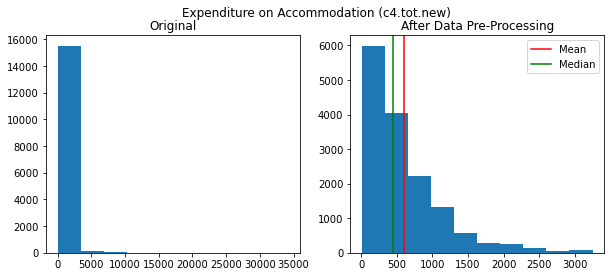

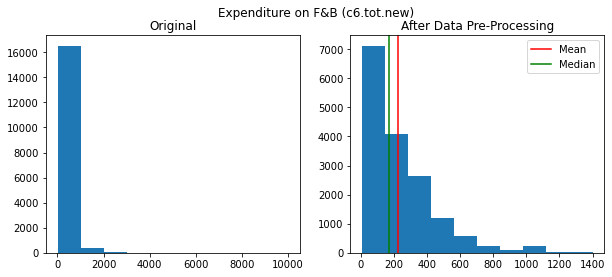

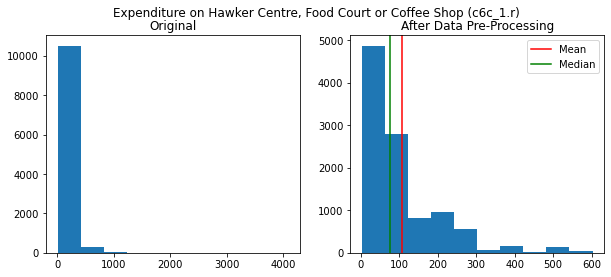

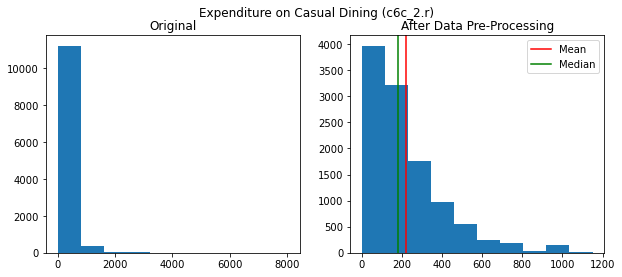

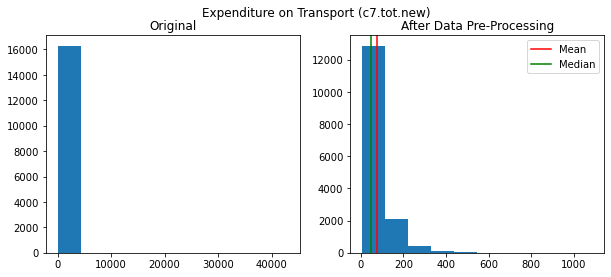

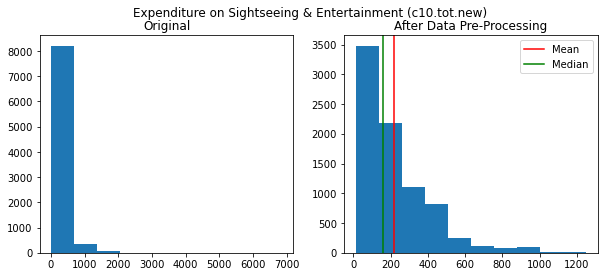

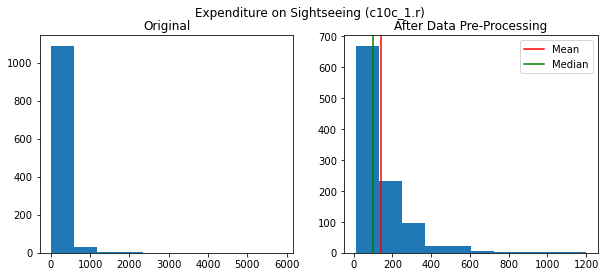

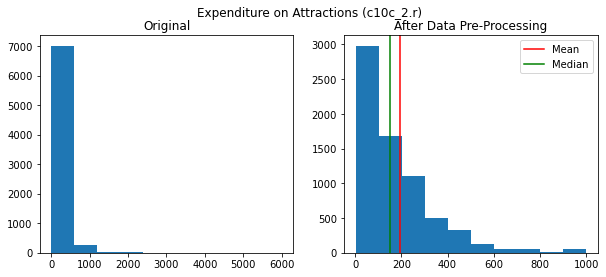

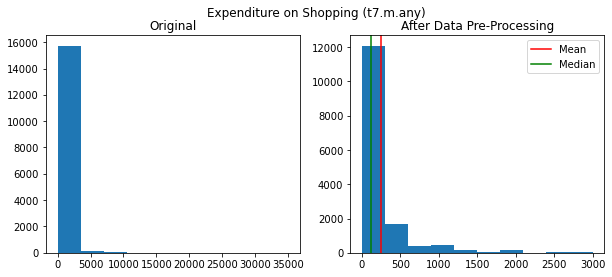

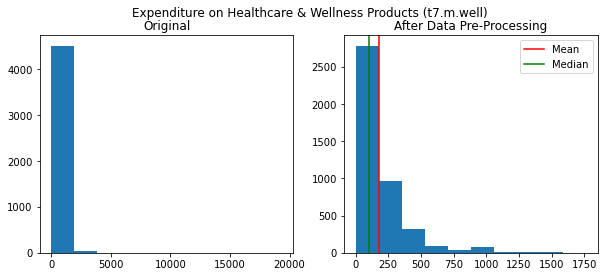

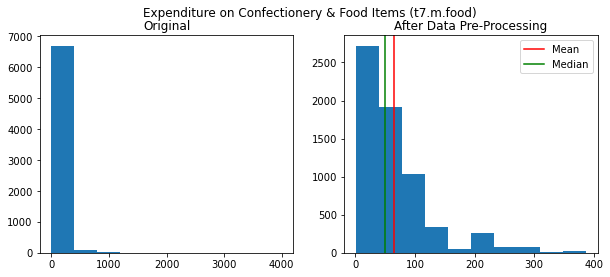

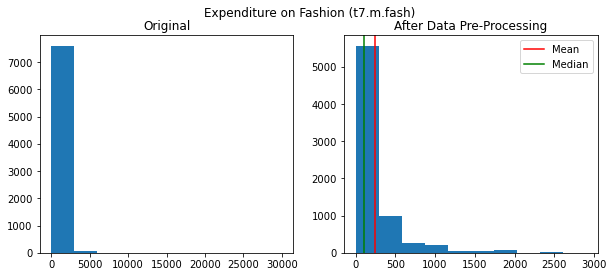

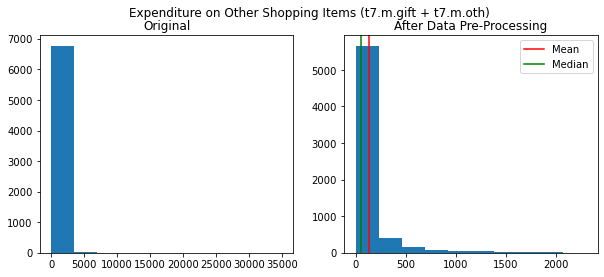

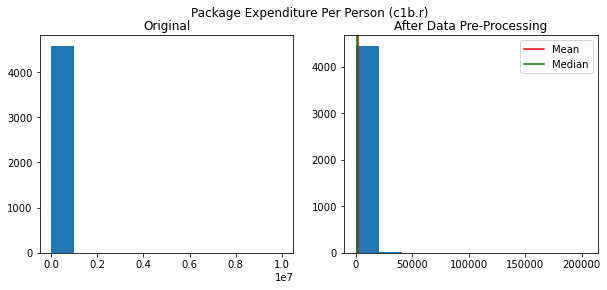

In [22]:
# Comparison of distributions before and after data pre-processing
plot_hist(OVS2019, cleaned_OVS2019, list_expnd)

In [23]:
# Drop irrelevant columns, i.e. first 3 columns
cleaned_OVS2019 = cleaned_OVS2019.drop(columns=['respondent_id', 'outlier', 'dummy'])

# Drop outdated variables
cleaned_OVS2019 = cleaned_OVS2019.drop(columns=['c4.tot', 'c6.tot', 'c7.tot', 'c10.tot'])

# Drop inaccurate variable
cleaned_OVS2019 = cleaned_OVS2019.drop(columns=['c3.r'])

In [24]:
cleaned_OVS2019.head()

,month,Mode of Transport (m1),a1,a4,a5,r.int1,r.int2,b1a,b1b,b2,...,f7a_n,b12number_3_5,b12number_7_8,c8b_99,c8b_1,c8b_3,c8b_5,c8b_6,c8b_7,c8b_11
0,10,1,1,44,161,21,3,1,nan,1,...,4.0000,2.0000,nan,0,0,0,1,1,1,0
1,10,1,1,83,130,3,1,1,nan,1,...,nan,nan,nan,0,1,0,0,1,0,0
2,10,1,1,44,161,21,3,1,nan,1,...,5.0000,3.0000,nan,0,1,0,1,1,0,0
3,10,1,1,44,90,30,6,1,nan,1,...,7.0000,nan,nan,0,1,0,0,0,0,1
4,10,1,1,44,161,21,3,2,1.0000,1,...,5.0000,nan,nan,0,0,0,0,0,0,0


In [25]:
# Write cleaned dataframe to a csv file
cleaned_OVS2019.to_csv(cwd + r'/Real Data/OVS2019_cleaned.csv', index=False, header=True)